# Relatório Projeto Final - Imagens de Raio-X para diagnóstico de COVID-19
Relatório referente ao projeto final da disciplina de Ciência e Visualização de dados em Saúde, ministrada no primeiro semestre de 2020.  
**Professores:** Paula Dornhofer Paro Costa e André Santanché  
**Alunos:** Eduardo Ferreira, Henrique Orpheu, Leandro Carvalho e Nathan Ribeiro

## Dados Utilizados
Os dados utilizados provém de diferentes fontes, sendos estas denominadas:
*   ["COVID-CT-Dataset: a CT scan dataset about COVID-19" - Zhao, Jinyu and Zhang, Yichen and He, Xuehai and Xie, Pengtao (2020)](https://github.com/UCSD-AI4H/COVID-CT)
*   ["COVID-19 - China Consortium of Chest CT Image Investigation(CC-CCII)"](http://ncov-ai.big.ac.cn/download?lang=en)
* ["COVID-19 image data collection" - Cohen, Joseph Paul and Morrison, Paul and 
Dao, Lan](https://github.com/ieee8023/covid-chestxray-dataset)
* ["Chest X-Ray Images (Pneumonia)" - Mooney, Paul](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)

## Introdução
Nossa proposta é utilizar imagens de raio-x dos pulmões e de tomografia computadorizada para classificar a partir destas imagens, casos de COVID-19.

Para tal, iremos explorar o uso de modelos de redes neurais, aplicadas para a tarefa de classificação de imagens de exames, para de alguma forma, possívelmente auxiliar no diagnóstico médico rápido para casos de COVID-19.

## Abordagem
Este trabalho seguirá os seguintes passos em seu desenvolvimento:
1.   **Carregamento dos dados e Pré-processamento:** dados serão carregados a partir de uma pasta compartilhada no Google Drive.
2.   **Data Augmentation:** os dados irão ser aplicados ao processo de "Data Augmentation" com o objetivo de reduzir os efeitos de overfitting.
3. **Criação de um modelo de Baseline:** foram criados e eplorados alguns modelos de baseline que serão utilizados como base de comparação para futuras melhorias.
4. **Transfer Learning:** Otimização de parâmetros e novos modelos de Deep Learning propostos para melhorar a acurácia de classificação das imagens.
5. **Resultados finais e conclusões**
6. **Referências**

## Instruções de Uso
Para que este documento possa ser utilizado, recomenda-se que a GPU gratuita do Google Colab seja utilizada para agilizar o processo de treinamento dos algoritmos de Deep Learning. Para isso, acesse Edit->Notebook settings e, no campo 'hardware accelerator', selecione o item GPU.

## Bibliotecas adicionais

Foi necessária a utilização da biblioteca "keras-efficientnets" que não faz parte do conjunto de bibliotecas pré-disponibilizadas no ambiente do Colab, o código para instalação da mesma né apresentada no trecho de código abaixo:


In [ ]:
!pip install -U git+https://github.com/titu1994/keras-efficientnets

  Cloning https://github.com/titu1994/keras-efficientnets to /tmp/pip-req-build-y2kyk5q6
  Running command git clone -q https://github.com/titu1994/keras-efficientnets /tmp/pip-req-build-y2kyk5q6
  Created wheel for keras-efficientnets: filename=keras_efficientnets-0.1.7-py2.py3-none-any.whl size=16395 sha256=a24b8b3be00124c458a009563afc841a645174d66f6f7e5272cd953be7bd6d27
  Stored in directory: /tmp/pip-ephem-wheel-cache-53l2mrgp/wheels/17/c1/63/806611ab6cf734f0c13b5100a49ac0cb5d6dab18fd067cde99
Successfully built keras-efficientnets


# Carregamento dos dados e pré-processamento
Dado o objetivo de classificar as imagens analisadas em casos de COVID e casos normais, separamos os arquivos em dois conjuntos de pastas (COVID, NonCOVID), estas pastas estão presentes para ambos os datasets (RX e TC).

## Dados de Raio-X Torácico
Em nossas analises utilizamos os dados coletados da base de dados "COVID-19 image data collection" - Cohen, Joseph Paul and Morrison, Paul and Dao, Lan e os dados da base "Chest X-Ray Images (Pneumonia)" - Mooney, Paul.

Os arquivos oriundos destas bases foram colocadas em uma pasta única e classificados conforme o diagnóstico presente no arquivo de metadados de cada base (quando disponíveis)

Em seguida as imagens foram organizadas e serviram de entrada para os modelos de Deep Learning avaliados.

## Dados de Tomografia Computadorizada
Os dados de tomografia computadorizada que tivemos acesso foram compartilhados no formato .jpg e .png e representavam apenas uma das camadas da tomografia computadorizada realizada para cada paciente.

Os arquivos oriundos destas bases foram colocadas em uma pasta única e classificados conforme o diagnóstico presente no arquivo de metadados de cada base (quando disponíveis).

## Carregando os dados do Google Drive
Para realizar o carregamento dos dados do Google Drive em um notebook do Google Colab é necessário primeiro conectar ambas as soluções, a fim de facilitar este processo o Google oferece uma biblioteca pré-instalada em sua plataforma para fazer a ligação dos mesmos. O trecho de código abaixo faz o processo de montagem do disco de arquivos do Google Drive no Kernel do Google Colab para habilitar a manipulação de arquivos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Como é possível verificar abaixo, a conexão ao Google Drive foi efetuada com sucesso e é possível listar o conteúdo da pasta utilizando o comando "ls" do sistema Linux.

In [ ]:
!ls "/content/drive/My Drive/COVID19"

baseline_cnn_model.hdf5		      resnet50_model.hdf5
CT_COVID			      test_model.hdf5
CT_COVID.zip			      unet_model.hdf5
CT_FILES			      vgg16_model.hdf5
CT_NonCOVID			      xceptionnet_model.hdf5
CT_NonCOVID.zip			      XRAY_COVID
effnet_model.hdf5		      XRAY_FILES
metadata.csv			      XRAY_NonCOVID
multilayer_perceptron_cnn_model.hdf5


Dado que temos acesso agora aos arquivos iremos realizar o processo de carregamento e pré-processamento dos dados por meio da leitura dos arquivos de metadado disponibilizados pelas bases.

Para tal iremos utilizar a biblioteca Pandas para fazer a leitura do arquivo CSV e iremos aplicar alguns filtros nesta base para selecinar as imagens positivas e negativas para o diagnóstico de COVID-19.

In [ ]:
import pandas as pd
import glob

# Import dos metadados de imagens de Raio X
# Filtrando os dados por dados positivos e nagativos onde a modalidade do arquivo é de Raio X e a visão é póstero-anterior
iee_files = pd.read_csv("/content/drive/My Drive/COVID19/metadata.csv")
xray_positive_files = iee_files[iee_files.finding.eq("COVID-19") & iee_files.modality.eq("X-ray") & iee_files.view.isin(["PA","AP", "AP Supine"])]["filename"]
xray_negative_files = iee_files[iee_files.finding.eq("No Finding") & iee_files.modality.eq("X-ray") & iee_files.view.isin(["PA","AP","AP Supine"])]["filename"]
ct_positive_files = glob.glob("/content/drive/My Drive/COVID19/CT_COVID/*")
ct_negative_files = glob.glob("/content/drive/My Drive/COVID19/CT_NonCOVID/*")

print("Quantidade de arquivos de Raio-X positivos para Covid: " + str(len(xray_positive_files)))
print("Quantidade de arquivos de Raio-X negativos para Covid: " + str(len(xray_negative_files)))
print("Quantidade de arquivos de Tomografia Computadorizada positivos para Covid: " + str(len(ct_positive_files)))
print("Quantidade de arquivos de Tomografia Computadorizada negativos para Covid: " + str(len(ct_negative_files)))

Quantidade de arquivos de Raio-X positivos para Covid: 422
Quantidade de arquivos de Raio-X negativos para Covid: 19
Quantidade de arquivos de Tomografia Computadorizada positivos para Covid: 349
Quantidade de arquivos de Tomografia Computadorizada negativos para Covid: 397


Como é possível observar, a quantidade de imagens positivas para o diagnóstico de COVID-19 é superior ao diagnóstico negativo, desta forma, pensamos na estratégia de utilizar um dataset de imagens de Raio X pulmonar onde existisse uma maior quantidade de imagens neutras para qualquer diagnóstico de doença.

Nos utilizamos do dataset "Chest X-Ray Images (Pneumonia)" - Mooney, Paul, este dataset faz parte de um conjunto de dados disponibilizado para uma competição da plataforma Kaggle que busca a classificação de imagens de Raio-X de Pneumonia Viral e Bacterial.

Fizemos uma seleção manual para ter acesso a aproximadamente 1500 imagens de exames neutras a quaisquer diagnóstico.

In [ ]:
###########################################################################################################################
# Este bloco de código deve ser executado somente uma vez para copiar os arquivos de raio-x adicionais de casos negativos
###########################################################################################################################
# for file in glob.glob("/content/drive/My Drive/COVID19/XRAY_NonCOVID/*"):
#   filename = "'" + file + "'"
#   !cp {filename} "/content/drive/My Drive/COVID19/XRAY_FILES/XRAY_NonCOVID"

xray_negative_files = "/content/drive/My Drive/COVID19/XRAY_COVID/" + xray_negative_files

additional_xray_negative = pd.Series(glob.glob("/content/drive/My Drive/COVID19/XRAY_NonCOVID/*"))
xray_negative_files = pd.concat([xray_negative_files, additional_xray_negative])

print("Quantidade de arquivos de Raio-X positivos para Covid: " + str(len(xray_positive_files)))
print("Quantidade de arquivos de Raio-X negativos para Covid: " + str(len(xray_negative_files)))
print("Quantidade de arquivos de Tomografia Computadorizada positivos para Covid: " + str(len(ct_positive_files)))
print("Quantidade de arquivos de Tomografia Computadorizada negativos para Covid: " + str(len(ct_negative_files)))

Quantidade de arquivos de Raio-X positivos para Covid: 422
Quantidade de arquivos de Raio-X negativos para Covid: 1602
Quantidade de arquivos de Tomografia Computadorizada positivos para Covid: 349
Quantidade de arquivos de Tomografia Computadorizada negativos para Covid: 397


Como é possível observar, isso implicou num aumento significativo de imagens negativas para o diagnóstico de COVID-19. Infelizmente não encontramos outros datasets para tentar balancear a quantidade de imagens com achados médicos da COVID, entretanto utilizaremos técnicas para tentar balancear o efeito do desbalanceamento dos dados.

Simplemente para avaliar as imagens disponíveis no dataset, fizemos o trecho de código a seguir para avaliar as imagens disponíveis.
Para tal foi necessária a importação das bibliotecas:

*   **OpenCV:**  é uma biblioteca de visão computacional que fornece diferentes funções para visualização e manipulação de dados sendo amplamente utilizada para tais fins.
*   **Matplotlib:** é uma biblioteca de software para criação de gráficos e visualizações de dados em geral, feita para a da linguagem de programação Python e sua extensão de matemática NumPy.

Fizemos também uma seleção aleatória de imagens para criar uma área de plotagem das imagens positivas/negativas para o diagnóstico de COVID, tanto para o dataset de imagens de Raio X quanto para o de imagens de Tomografia Computadorizada.

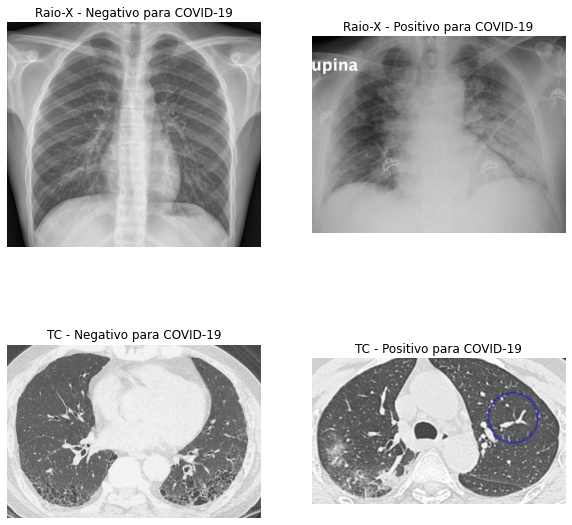

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random

xray_positive_index = random.randint(0, len(xray_positive_files))
xray_negative_index = random.randint(0, len(xray_negative_files))
ct_positive_index = random.randint(0, len(ct_positive_files))
ct_negative_index = random.randint(0, len(ct_negative_files))

xray_image_positive = cv2.imread("/content/drive/My Drive/COVID19/XRAY_COVID/" + xray_positive_files.iloc[xray_positive_index])
xray_image_negative = cv2.imread(xray_negative_files.iloc[xray_negative_index])
ct_image_positive = cv2.imread(ct_positive_files[ct_positive_index])
ct_image_negative = cv2.imread(ct_negative_files[ct_negative_index])


f = plt.figure(figsize=(10, 10))
f.add_subplot(2, 2, 1)
plt.axis('off')
plt.title("Raio-X - Negativo para COVID-19")
plt.imshow(xray_image_negative)
f.add_subplot(2, 2, 2)
plt.axis('off')
plt.title("Raio-X - Positivo para COVID-19")
plt.imshow(xray_image_positive)
f.add_subplot(2, 2, 3)
plt.axis('off')
plt.title("TC - Negativo para COVID-19")
plt.imshow(ct_image_negative)
f.add_subplot(2, 2, 4)
plt.axis('off')
plt.title("TC - Positivo para COVID-19")
plt.imshow(ct_image_positive)

Uma vez que é possível manipular as imagens iremos carregá-las em variáveis que possuém os labels de positivo e negativo para cada uma das imagens e também as imagens propriamente ditas, nesta etapa estamos carregando as imagens com o auxílio da biblioteca OpenCV, modificando os [canais de cores](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html) das imagens e aplicando um [resize](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=resize) em seus tamanhos para reduzir a complexidade do conjunto de imagens e agilizar o processo de treinamento.

Durante o desenvolvimento dos modelos, nos deparamos com uma limitação do Google Colab, por se tratar de uma grande quantidade de imagens e por estarmos tratando as mesmas em variáveis, o consumo de memória do Kernel disponibilizado via Google Colab superou os 12 GB oferecidos gratuitamente e gerava constantes problemas na execução.

A fim de minimizar os impactos optamos por reduzir o conjunto de imagens negativas para o diagnósitco de COVID para 1000 amostras.

In [ ]:
import numpy as np

data_xray = []
labels_xray = []
data_ct = []
labels_ct = []

for file in xray_positive_files:
  filename = "/content/drive/My Drive/COVID19/XRAY_COVID/" + file
  image = cv2.imread(filename)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (256, 256))
  data_xray.append(image)
  labels_xray.append(1)


for index, file in enumerate(xray_negative_files):
  if(index >= 1000):
    break
  filename = file
  image = cv2.imread(filename)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (256, 256))
  data_xray.append(image)
  labels_xray.append(0)

for file in ct_positive_files:
  filename = file
  image = cv2.imread(filename)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (256, 256))
  data_ct.append(image)
  labels_ct.append(1)

for file in ct_negative_files:
  filename = file
  image = cv2.imread(filename)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (256, 256))
  data_ct.append(image)
  labels_ct.append(0)

data_xray = np.array(data_xray) / 255.0
data_ct = np.array(data_ct) / 255.0
labels_xray = np.array(labels_xray)
labels_ct = np.array(labels_ct)

# Data Augmentation e Distribuição de arquivos

A técnica de Data Augmentation é uma técnica utilizada para ampliar o dataset que estamos utilizando utilizando as próprias imagens contidas nele, estamos executando esta etapa para tentar reduzir a chance de overfit dos dados disponíveis nas bases.

A biblioteca Keras que iremos utilizar para a construção dos modelos possuí uma [séries de ferramentas de manipulação de imagens](https://medium.com/mlait/image-data-augmentation-image-processing-in-tensorflow-part-2-b77237256df0) que possibilitam a aplicação de distorções, ampliações, rotações e etc.

O objetivo deste processo é enriquecer os dados de entrada dos modelos de modo a reduzir os impactos do que chama-mos de "overfit", este termo é utilizado quando o conjunto dados disponíveis são muito especializados e a extrapolação dos resultados acaba não atendendo uma generalização.

Um exemplo de como é feito o Data Augmentation em uma imagem é mostrado a seguir:

![Data Augentation na fotografia de um cachorro](https://miro.medium.com/max/1330/1*MUOrB2-H5qkJop3Kl2oYmQ.png)

O módulo do Keras fornece a função ["ImageDataGenerator()"](https://keras.io/api/preprocessing/image/) cujo objetivo é aplicar o processo de geração de imagens com filtros e manipulações automaticamente. Para isso iremos importar a implementação do Keras da biblioteca Tensorflow:



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.2.0


Uma vez importadas iremos criar os geradores de imagens aplicando as manipulações de rotação, interpolação de pixels com o método nearest.

Importamos nesta etapa a função train_test_split() da biblioteca sklearn com o objetivo de separar o conjunto de dados em teste e treino que serão as entradas do nosso modelo futuramente. Adotamos uma distribuição de 80% dos arquivos para treinamento e 20% para teste.

In [ ]:
from sklearn.model_selection import train_test_split
trainX_xray, testX_xray, trainY_xray, testY_xray = train_test_split(data_xray, labels_xray,stratify=labels_xray,
	test_size=0.20,  random_state=42)

trainX_ct, testX_ct, trainY_ct, testY_ct = train_test_split(data_ct, labels_ct,stratify=labels_ct,
	test_size=0.20,  random_state=42)

trainAug  = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

# Criação de um modelo de Baseline

Para a construção e avaliação dos modelos de deep learning, uma rede neural inicial será construida.

Em seguida adotamos a utilização de uma rede que encontramos durante o processo de revisão bibliográfica, esta rede é uma modificação da rede XceptionNet que foi aplicada a mesma tarefa proposta por este trabalho, a ideia era aplicar a mesma rede ao nosso conjunto de dados e avaliar se conseguiriamos obter resultados similares. 

## Funções básicas

Durante o processo de desenvolvimento fomos criando algumas funções que deveriam ser reaproveitadas. As funções presentes nos blocos a seguir são responsáveis pela plotagem dos gráficos de aprendizagem dos modelos usadas na avaliação dos resultados obtidos, na impressão das métricas de avaliação das redes implementadas e responsável por executar o "Fit" dos dados de treinamento e teste ao modelo.

Na função de "Fit" do modelo, adotamos a aplicação de alguns parâmetros responsáveis por:
*   Salvar ao longo do treinamento os pesos dos melhores resultados
*   Encerrar o treinamento antecipadamente se, dada a presença de um platô na aprendizagem do modelo

Definimos também a variável de [Batch Size](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/#:~:text=The%20batch%20size%20is%20a%20number%20of%20samples%20processed%20before,samples%20in%20the%20training%20dataset.) que iremos aplicar nos nossos modelos e nos conjuntos e treino e teste.

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.applications import *
from keras.regularizers import *
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import seaborn as sns
sns.set_style("darkgrid", {'axes.grid' : False})

BS = 32

def plot_history(history):
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='center right')
  plt.show()
  if 'acc' in history.history.keys():
    plot_accuracy(history)
  
def plot_accuracy(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.ylim((0,1))
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='center right')
  plt.show()


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names =['Normal','Covid']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def run_model(X, y, X_test, y_test, model, model_file):
  model_checkpoint = ModelCheckpoint(model_file, monitor="val_loss", save_best_only=True)
  early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

  history = model.fit_generator(trainAug.flow(X, y, batch_size=BS),
                                steps_per_epoch=len(X) // BS,
                                validation_data=(X_test, y_test),
                                validation_steps=len(X_test) // BS,
                                epochs=150,
                                callbacks=[model_checkpoint, early_stop],
                                verbose=1)
  return history

def plot_metrics(model_path, test_X, test_Y):
  pred_Y = []
  y_pred = model.predict(test_X, batch_size=32, verbose=1)
  
  for pred in y_pred:
    if pred > 0.5:
      pred_Y.append(1)
    else:
      pred_Y.append(0)
      
  _, acc = model.evaluate(test_X, test_Y)
  pred_Y = np.asarray(pred_Y)

  # classification report
  print("Acurácia no conjunto de teste: {0}".format(acc))
  print(classification_report(test_Y, pred_Y))

  # confusion matrix
  matrix = confusion_matrix(test_Y, pred_Y)
  plot_confusion_matrix(matrix, classes = range(2))

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Convolutional Neural Network

Uma Rede Neural Convolucional (ConvNet / Convolutional Neural Network / CNN) é um algoritmo de Deep Learning que dada uma imagem de entrada, atribui pesos e vieses a objetos da imagem, sendo no final capaz de diferenciar um do outro.

A pré-configuração exigida em uma ConvNet é muito menor em comparação com outros algoritmos de classificação e portanto decidimos que este tipo de rede seria adequada para realizar uma análise incial.
 
A rede que criamos é composta de três camadas de [Convolução](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) seguidas por camadas e [MaxPolling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D), em seguida é aplicada uma camada de [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) e duas camadas [Densas](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) separadas por um [Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) minímo para reduzir efeitos de overfitting dos dados.

In [ ]:
def baseline_model():
  model = Sequential([
      Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.01),
             bias_regularizer=l2(0.01), input_shape=(256, 256, 3)),
      MaxPooling2D(2, 2),
      Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.01),
             bias_regularizer=l2(0.01)),
      MaxPooling2D(2,2),
      Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.01),
             bias_regularizer=l2(0.01)),
      MaxPooling2D(2,2),
      Flatten(),
      Dense(64, activation='relu', kernel_regularizer=l2(0.01),
            bias_regularizer=l2(0.01)),
      Dropout(0.2),
      Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01),
            bias_regularizer=l2(0.01))
  ])
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
  model.save("/content/drive/My Drive/COVID19/baseline_cnn_model.hdf5")
  model.summary()
  return model
  
model = baseline_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)            

In [ ]:
xray_history = run_model(trainX_xray, trainY_xray, testX_xray, testY_xray, model, "/content/drive/My Drive/COVID19/baseline_cnn_model.hdf5")

Epoch 1/150
35/35 [==============================] - 18s 525ms/step - loss: 1.3871 - acc: 0.8172 - val_loss: 0.8411 - val_acc: 0.9193
Epoch 2/150
35/35 [==============================] - 14s 394ms/step - loss: 0.6821 - acc: 0.9294 - val_loss: 0.5755 - val_acc: 0.9263
Epoch 3/150
35/35 [==============================] - 13s 379ms/step - loss: 0.5089 - acc: 0.9385 - val_loss: 0.4807 - val_acc: 0.9298
Epoch 4/150
35/35 [==============================] - 13s 385ms/step - loss: 0.4143 - acc: 0.9421 - val_loss: 0.4407 - val_acc: 0.9158
Epoch 5/150
35/35 [==============================] - 13s 383ms/step - loss: 0.3745 - acc: 0.9439 - val_loss: 0.3859 - val_acc: 0.9333
Epoch 6/150
35/35 [==============================] - 13s 382ms/step - loss: 0.3709 - acc: 0.9367 - val_loss: 0.3699 - val_acc: 0.9298
Epoch 7/150
35/35 [==============================] - 13s 382ms/step - loss: 0.3706 - acc: 0.9357 - val_loss: 0.3483 - val_acc: 0.9404
Epoch 8/150
35/35 [==============================] - 13s 381ms

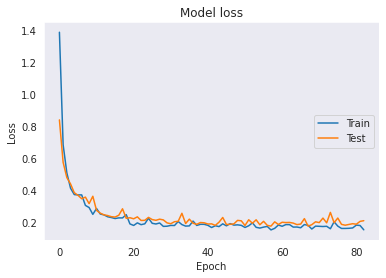

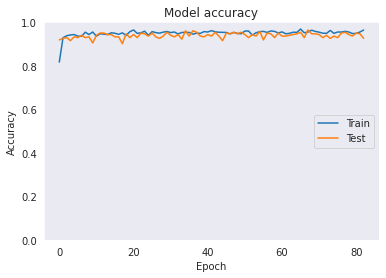

285/285 [==============================] - 0s 1ms/step
Acurácia no conjunto de teste: 0.9263157844543457
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       200
           1       0.93      0.81      0.87        85

    accuracy                           0.93       285
   macro avg       0.93      0.89      0.91       285
weighted avg       0.93      0.93      0.92       285



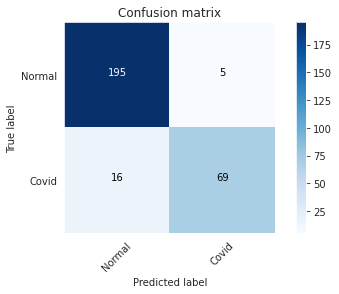

In [ ]:
plot_history(xray_history)
plot_metrics("/content/drive/My Drive/COVID19/baseline_cnn_model.hdf5", testX_xray, testY_xray)

Avaliando os resultados iniciais podemos identificar que mesmo uma rede convolucional simples pode obter uma acurácia alta para o conjunto de imagens de Raio-X de Pulmão, iremos verificar que o mesmo não se repete para as imagens de Tomografia computadorizada.

O uso de redes convolucionais apresenta resultados precisos, com maior recall e f1-score médios, sendo um tipo de rede recomendada para a tarefa de classificar as imagens de Raio-X.

Foi utilizada uma camada de Dropout na saída do modelo para evitar ao máximo o viés e overfitting dos dados no modelo, efetivamente ignorando 20% dos pesos de conexões entre a camada final e a convolucional da rede.

In [ ]:
ct_history = run_model(trainX_ct, trainY_ct, testX_ct, testY_ct, model, "/content/drive/My Drive/COVID19/baseline_cnn_model.hdf5")

Epoch 1/150
18/18 [==============================] - 7s 408ms/step - loss: 0.8491 - acc: 0.4539 - val_loss: 0.7652 - val_acc: 0.4467
Epoch 2/150
18/18 [==============================] - 7s 371ms/step - loss: 0.7693 - acc: 0.4574 - val_loss: 0.7638 - val_acc: 0.4667
Epoch 3/150
18/18 [==============================] - 7s 375ms/step - loss: 0.7614 - acc: 0.5053 - val_loss: 0.7456 - val_acc: 0.5733
Epoch 4/150
18/18 [==============================] - 7s 392ms/step - loss: 0.7360 - acc: 0.5972 - val_loss: 0.7577 - val_acc: 0.5533
Epoch 5/150
18/18 [==============================] - 7s 378ms/step - loss: 0.7549 - acc: 0.5957 - val_loss: 0.7419 - val_acc: 0.6400
Epoch 6/150
18/18 [==============================] - 7s 378ms/step - loss: 0.7395 - acc: 0.6188 - val_loss: 0.7235 - val_acc: 0.6333
Epoch 7/150
18/18 [==============================] - 7s 372ms/step - loss: 0.7393 - acc: 0.5978 - val_loss: 0.7088 - val_acc: 0.7067
Epoch 8/150
18/18 [==============================] - 7s 380ms/step - 

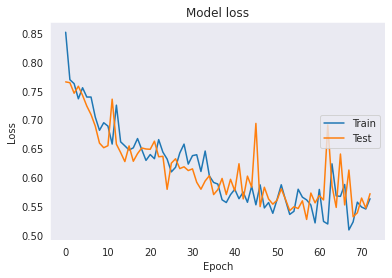

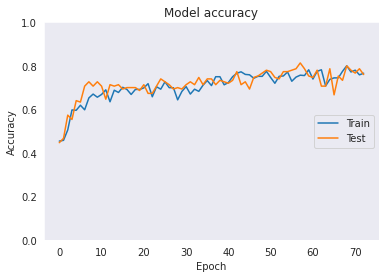

150/150 [==============================] - 0s 1ms/step
Acurácia no conjunto de teste: 0.7599999904632568
              precision    recall  f1-score   support

           0       0.91      0.61      0.73        80
           1       0.68      0.93      0.78        70

    accuracy                           0.76       150
   macro avg       0.79      0.77      0.76       150
weighted avg       0.80      0.76      0.76       150



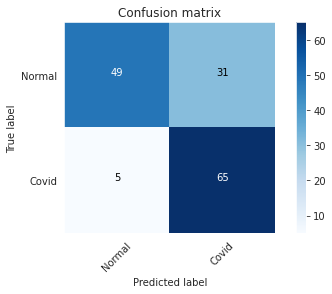

In [ ]:
plot_history(ct_history)
plot_metrics("/content/drive/My Drive/COVID19/baseline_cnn_model.hdf5", testX_ct, testY_ct)

Diferentemente do conjunto de dados de Raio X, o modelo de rede convolucional aplicado as imagens de tomografia computadorizada apresentou um resultado geral inferior ao anterior, apesar de apresentar uma acurácia média de ~75%, as métricas de precisão, recall e f1-score acompanham os resultados da acurácia.

## Modified XceptionNet

Fazendo uma revisão sobre os últimos artigos disponíveis na acadêmia que tinham como objetivo a classificação de imagens de diagnóstico com base em redes neurais, identificamos uma implementação de rede chamada XceptionNet.

Esta rede foi desenvolvida com o objetivo de identificar faces modificadas por meio de algoritmos de Deep Fake, entretanto têm mostrado bons resultados para outros domínios de aplicação. 

Um exemplo foi a modificação desta rede proposta no artigo ["Diagnosis of Coronavirus Disease (COVID-19) from Chest X-Ray images using modified XceptionNet."](https://www.researchgate.net/publication/341966812_Diagnosis_of_Coronavirus_Disease_COVID-19_from_Chest_X-Ray_images_using_modified_XceptionNet) escrito por Singh, Krishna Kant et al. 

Os resultados atingidos por eles no conjunto de imagens que coletaram apresentou resultados excelentes e com o objetivo de avaliar se a performance obtida por eles seria semelhante no nosso conjunto de dados, resolvemos avaliar os resultados.


In [ ]:
def xceptionnet_model():
  inputs = Input(shape=(256, 256, 3))
  # First conv block
  x = Conv2D(filters=4, kernel_size=(3, 3), activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding='same')(inputs)
  x = Conv2D(filters=4, kernel_size=(3, 3), activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding='same')(x)
  x = MaxPool2D(pool_size=(2, 2))(x)

  # second conv block
  x = Conv2D(filters=8, kernel_size=(3, 3), activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding='same')(inputs)
  x = Conv2D(filters=8, kernel_size=(3, 3), activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding='same')(x)
  x = MaxPool2D(pool_size=(2, 2))(x)

  # third conv block
  x = Conv2D(filters=16, kernel_size=(3, 3), activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding='same')(inputs)
  x = Conv2D(filters=16, kernel_size=(3, 3), activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding='same')(x)
  x = MaxPool2D(pool_size=(2, 2))(x)


  # first separable conv block
  x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding='same')(x)
  x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D(pool_size=(2, 2))(x)


  # second separable conv block
  x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding='same')(x)
  x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D(pool_size=(2, 2))(x)


  # third separable conv block
  x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding='same')(x)
  x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D(pool_size=(2, 2))(x)
  x = Dropout(rate=0.2)(x)

  # fourth separable conv block
  x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding='same')(x)
  x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D(pool_size=(2, 2))(x)
  x = Dropout(rate=0.2)(x)

  # fifth separable conv block
  x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding='same')(x)
  x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D(pool_size=(2, 2))(x)
  x = Dropout(rate=0.2)(x)

  # sixth separable conv block
  x = SeparableConv2D(filters=512, kernel_size=(3, 3), activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding='same')(x)
  x = SeparableConv2D(filters=512, kernel_size=(3, 3), activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D(pool_size=(2, 2))(x)
  x = Dropout(rate=0.2)(x)

  # FC layer
  x = Flatten()(x)
  x = Dense(units=512, activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)
  x = Dropout(rate=0.2)(x)
  x = Dense(units=128, activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)
  x = Dropout(rate=0.2)(x)
  x = Dense(units=64, activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)
  x = Dropout(rate=0.2)(x)
  x = Dense(units=32, activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)
  x = Dropout(rate=0.2)(x)

  # Output layer
  output = Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)

  # Creating model and compiling
  model = Model(inputs=inputs, outputs=output)
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
  model.save("/content/drive/My Drive/COVID19/xceptionnet_model.hdf5")
  model.summary()
  return model

model = xceptionnet_model()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 256, 256, 16)      2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 128, 128, 32)      688       
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 128, 128, 32)      1344      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128 

In [ ]:
xray_history = run_model(trainX_xray, trainY_xray, testX_xray, testY_xray, model, "/content/drive/My Drive/COVID19/xceptionnet_model.hdf5")

Epoch 1/150
35/35 [==============================] - 19s 546ms/step - loss: 7.6606 - acc: 0.8552 - val_loss: 4.4681 - val_acc: 0.2982
Epoch 2/150
35/35 [==============================] - 16s 464ms/step - loss: 2.5755 - acc: 0.9430 - val_loss: 2.4192 - val_acc: 0.2982
Epoch 3/150
35/35 [==============================] - 16s 457ms/step - loss: 1.3660 - acc: 0.9638 - val_loss: 1.8303 - val_acc: 0.2982
Epoch 4/150
35/35 [==============================] - 16s 455ms/step - loss: 0.9125 - acc: 0.9620 - val_loss: 1.4151 - val_acc: 0.2982
Epoch 5/150
35/35 [==============================] - 16s 454ms/step - loss: 0.6757 - acc: 0.9656 - val_loss: 1.3152 - val_acc: 0.2982
Epoch 6/150
35/35 [==============================] - 16s 457ms/step - loss: 0.5557 - acc: 0.9584 - val_loss: 1.1453 - val_acc: 0.2982
Epoch 7/150
35/35 [==============================] - 16s 455ms/step - loss: 0.4258 - acc: 0.9710 - val_loss: 1.1179 - val_acc: 0.2982
Epoch 8/150
35/35 [==============================] - 16s 461ms

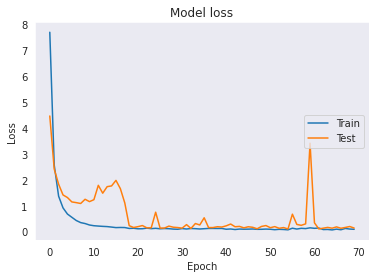

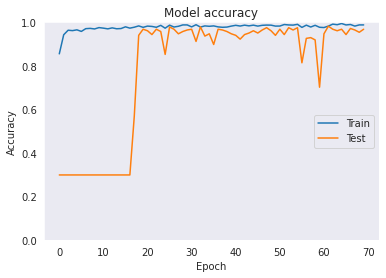

285/285 [==============================] - 1s 3ms/step
Acurácia no conjunto de teste: 0.9684210419654846
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       200
           1       0.93      0.96      0.95        85

    accuracy                           0.97       285
   macro avg       0.96      0.97      0.96       285
weighted avg       0.97      0.97      0.97       285



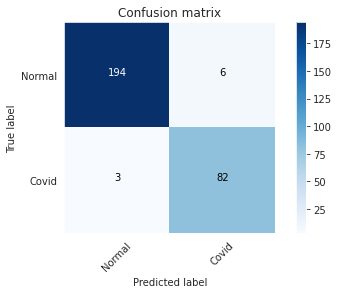

In [ ]:
plot_history(xray_history)
plot_metrics("/content/drive/My Drive/COVID19/xceptionnet_model.hdf5", testX_xray, testY_xray)

Comparado ao modelo de *baseline* com redes neurais convolucionais, o modelo modificado da XceptionNet apresentou melhorias frente as métricas de *precision, f1-score, recall*, atingimos resultados similares aos obtidos pelo artigo descrito anteriormente para o conjunto de dados que selecionamos, desta forma podemos confirmar que o mesmo é adequado para este tipo de classificação em imagens de Raio X.

In [ ]:
ct_history = run_model(trainX_ct, trainY_ct, testX_ct, testY_ct, model, "/content/drive/My Drive/COVID19/xceptionnet_model.hdf5")

Epoch 1/150
18/18 [==============================] - 9s 499ms/step - loss: 1.0032 - acc: 0.4752 - val_loss: 0.9390 - val_acc: 0.5333
Epoch 2/150
18/18 [==============================] - 8s 454ms/step - loss: 0.8728 - acc: 0.5443 - val_loss: 0.8031 - val_acc: 0.5533
Epoch 3/150
18/18 [==============================] - 8s 453ms/step - loss: 0.7420 - acc: 0.6330 - val_loss: 0.7366 - val_acc: 0.6133
Epoch 4/150
18/18 [==============================] - 8s 447ms/step - loss: 0.7146 - acc: 0.6294 - val_loss: 0.8955 - val_acc: 0.4800
Epoch 5/150
18/18 [==============================] - 8s 455ms/step - loss: 0.7041 - acc: 0.6578 - val_loss: 0.8622 - val_acc: 0.5267
Epoch 6/150
18/18 [==============================] - 8s 454ms/step - loss: 0.6427 - acc: 0.7163 - val_loss: 0.8565 - val_acc: 0.4933
Epoch 7/150
18/18 [==============================] - 8s 454ms/step - loss: 0.5835 - acc: 0.7482 - val_loss: 0.8691 - val_acc: 0.5133
Epoch 8/150
18/18 [==============================] - 8s 462ms/step - 

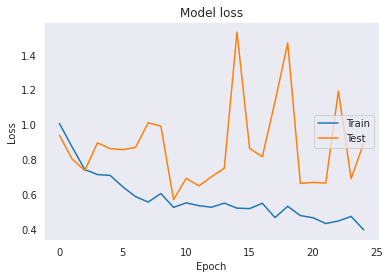

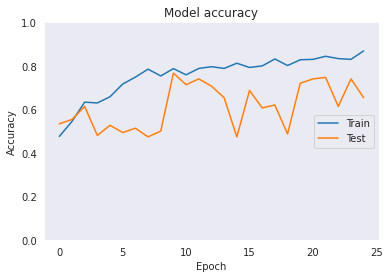

150/150 [==============================] - 0s 3ms/step
Acurácia no conjunto de teste: 0.653333306312561
              precision    recall  f1-score   support

           0       0.94      0.38      0.54        80
           1       0.58      0.97      0.72        70

    accuracy                           0.65       150
   macro avg       0.76      0.67      0.63       150
weighted avg       0.77      0.65      0.62       150



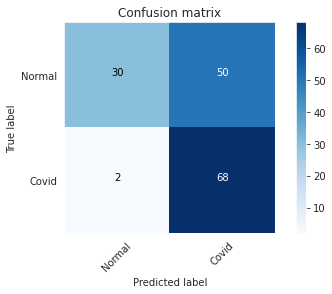

In [ ]:
plot_history(ct_history)
plot_metrics("/content/drive/My Drive/COVID19/xceptionnet_model.hdf5", testX_ct, testY_ct)

Observando os resultados para as imagens de Tomografia Computadorizada os resultados apresentam uma acurácia baixa se utilizando da mesma arquiteura de modelo, muito possivelmente o conjunto de dados que temos acesso não possui representatividade para obter resultados adequados neste modelo.

# Transfer Learning

Criar modelos de Deep Learning do zero pode se tornar uma tarefa complicada e que necessita de muitos recursos computacionais e dados para treinamento.

Desta forma o Transfer Learning surge como uma ferramenta para usufruir de conhecimento e de informações aprendidas por modelos conhecidos e treinados em milhões de dados de treinamento por pesquisadores e empresas.

Nos aproveitamos desta técnica com alguns dos modelos mais conhecidos e adicionamos camadas em seu fim para "especializar o modelo ao novo conjunto de dados".

Nesta seção são apresentados os resultados e suas análises.

## VGG16


In [ ]:
def vgg16_model():
  base_model = VGG16(include_top=False, weights='imagenet',input_shape=(256,256,3))

  for layer in base_model.layers:
    layer.trainable = False

  x = Flatten()(base_model.output)
  x = Dense(units=512, activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)
  x = GaussianNoise(stddev=0.1)(x)
  x = Dropout(rate=0.2)(x)
  x = Dense(units=128, activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)
  x = Dropout(rate=0.2)(x)
  x = BatchNormalization()(x)
  x = Dense(units=64, activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)
  x = Dropout(rate=0.2)(x)
  x = BatchNormalization()(x)
  x = Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)

  model = Model(inputs=base_model.input, outputs=x)
    
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
  model.save("/content/drive/My Drive/COVID19/vgg16_model.hdf5")
  model.summary()
  return model

model = vgg16_model()

58892288/58889256 [==============================] - 6s 0us/step
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
____________________________________________________________

In [ ]:
xray_history = run_model(trainX_xray, trainY_xray, testX_xray, testY_xray, model, "/content/drive/My Drive/COVID19/vgg16_model.hdf5")

Epoch 1/150
35/35 [==============================] - 23s 669ms/step - loss: 5.8773 - acc: 0.8914 - val_loss: 2.9795 - val_acc: 0.9614
Epoch 2/150
35/35 [==============================] - 18s 505ms/step - loss: 2.2418 - acc: 0.9538 - val_loss: 1.7049 - val_acc: 0.9719
Epoch 3/150
35/35 [==============================] - 18s 503ms/step - loss: 1.4640 - acc: 0.9493 - val_loss: 1.1993 - val_acc: 0.9719
Epoch 4/150
35/35 [==============================] - 17s 491ms/step - loss: 1.0772 - acc: 0.9511 - val_loss: 0.9243 - val_acc: 0.9684
Epoch 5/150
35/35 [==============================] - 17s 486ms/step - loss: 0.8890 - acc: 0.9557 - val_loss: 0.7633 - val_acc: 0.9754
Epoch 6/150
35/35 [==============================] - 17s 482ms/step - loss: 0.7827 - acc: 0.9500 - val_loss: 0.7072 - val_acc: 0.9544
Epoch 7/150
35/35 [==============================] - 16s 467ms/step - loss: 0.7042 - acc: 0.9578 - val_loss: 0.6492 - val_acc: 0.9333
Epoch 8/150
35/35 [==============================] - 17s 480ms

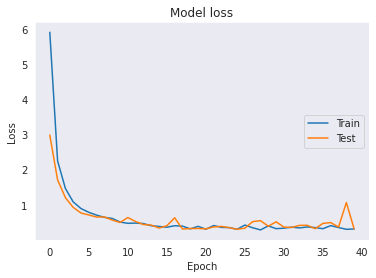

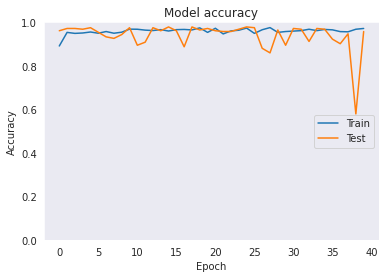

285/285 [==============================] - 2s 7ms/step
Acurácia no conjunto de teste: 0.9578947424888611
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       200
           1       0.96      0.89      0.93        85

    accuracy                           0.96       285
   macro avg       0.96      0.94      0.95       285
weighted avg       0.96      0.96      0.96       285



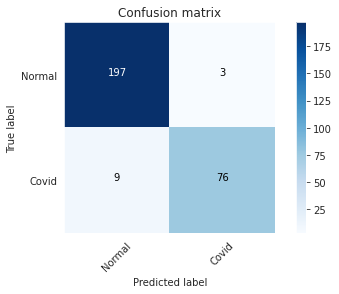

In [ ]:
plot_history(xray_history)
plot_metrics("/content/drive/My Drive/COVID19/vgg16_model.hdf5", testX_xray, testY_xray)

Comparado ao modelo de baseline com redes neurais convolucionais e com os resultados da XceptionNet, o modelo baseado na VGG16 apresentou métricas de precision, f1-score, recall equiparados aos obtidos pela XceptionNet, sendo assim, uma alternativa viável também para a classificação de imagens de Raio X.

In [ ]:
ct_history = run_model(trainX_ct, trainY_ct, testX_ct, testY_ct, model, "/content/drive/My Drive/COVID19/vgg16_model.hdf5")

Epoch 1/150
18/18 [==============================] - 13s 743ms/step - loss: 2.2605 - acc: 0.6631 - val_loss: 4.7449 - val_acc: 0.5333
Epoch 2/150
18/18 [==============================] - 9s 490ms/step - loss: 1.4925 - acc: 0.6897 - val_loss: 1.2268 - val_acc: 0.6933
Epoch 3/150
18/18 [==============================] - 9s 474ms/step - loss: 1.0419 - acc: 0.7624 - val_loss: 0.9140 - val_acc: 0.8200
Epoch 4/150
18/18 [==============================] - 8s 469ms/step - loss: 0.9139 - acc: 0.7795 - val_loss: 2.1386 - val_acc: 0.5333
Epoch 5/150
18/18 [==============================] - 9s 483ms/step - loss: 0.9737 - acc: 0.7717 - val_loss: 0.9587 - val_acc: 0.7067
Epoch 6/150
18/18 [==============================] - 10s 545ms/step - loss: 0.7653 - acc: 0.8369 - val_loss: 0.8864 - val_acc: 0.7600
Epoch 7/150
18/18 [==============================] - 8s 425ms/step - loss: 0.8730 - acc: 0.8085 - val_loss: 1.1752 - val_acc: 0.7067
Epoch 8/150
18/18 [==============================] - 9s 496ms/step 

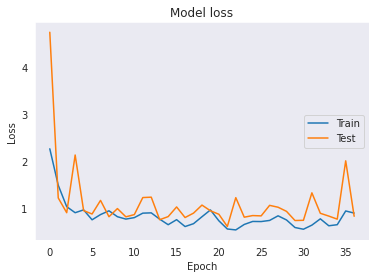

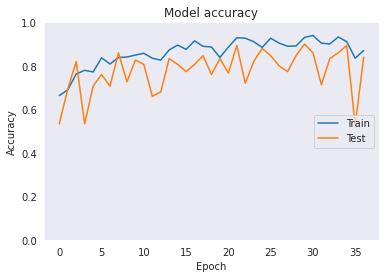

150/150 [==============================] - 1s 7ms/step
Acurácia no conjunto de teste: 0.8399999737739563
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        80
           1       0.86      0.79      0.82        70

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150



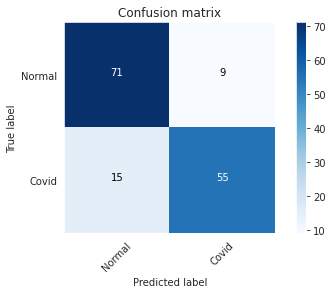

In [ ]:
plot_history(ct_history)
plot_metrics("/content/drive/My Drive/COVID19/vgg16_model.hdf5", testX_ct, testY_ct)

Analisando os resultados da aplicação da VGG16 é possível ver que em comparação com as anteriores ela apresenta uma acurácia um pouco maior para a classificação de imagens de tomografia computadorizada, entretano analisando as curvas de treinamento é possível observar um pouco de overfitting da rede para o conjunto de dados.

Outro ponto interessante é que também é possível observar que o conjunto de imagens de teste/validação do modelo pode não ter representatividade para o propósito da classificação, com um conjunto de dados maior talvez pudessmos atingir melhores resultados com a utilização desta rede.

## Residual Neural Network


In [ ]:
def resnet50_model():
  base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
  for layer in base_model.layers:
    layer.trainable = False

  x = Flatten()(base_model.output)
  x = Dense(units=512, activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)
  x = GaussianNoise(stddev=0.1)(x)
  x = Dropout(rate=0.2)(x)
  x = Dense(units=128, activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)
  x = Dropout(rate=0.2)(x)
  x = BatchNormalization()(x)
  x = Dense(units=64, activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)
  x = Dropout(rate=0.2)(x)
  x = BatchNormalization()(x)
  x = Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)

  model = Model(inputs=base_model.input, outputs=x)
    
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
  model.save("/content/drive/My Drive/COVID19/resnet50_model.hdf5")
  model.summary()
  return model

model = resnet50_model()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 9s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 128, 128, 64) 256         conv1[0][0]                      
___________________________

In [ ]:
xray_history = run_model(trainX_xray, trainY_xray, testX_xray, testY_xray, model, "/content/drive/My Drive/COVID19/resnet50_model.hdf5")

Epoch 1/150
35/35 [==============================] - 23s 661ms/step - loss: 10.4287 - acc: 0.9258 - val_loss: 8.9901 - val_acc: 0.2982
Epoch 2/150
35/35 [==============================] - 19s 543ms/step - loss: 3.6798 - acc: 0.9679 - val_loss: 5.0125 - val_acc: 0.2982
Epoch 3/150
35/35 [==============================] - 18s 526ms/step - loss: 2.1651 - acc: 0.9789 - val_loss: 3.5570 - val_acc: 0.2982
Epoch 4/150
35/35 [==============================] - 18s 522ms/step - loss: 1.8741 - acc: 0.9665 - val_loss: 4.4769 - val_acc: 0.2982
Epoch 5/150
35/35 [==============================] - 18s 519ms/step - loss: 1.5622 - acc: 0.9665 - val_loss: 2.5028 - val_acc: 0.7544
Epoch 6/150
35/35 [==============================] - 18s 510ms/step - loss: 1.4212 - acc: 0.9656 - val_loss: 1.9380 - val_acc: 0.7018
Epoch 7/150
35/35 [==============================] - 17s 497ms/step - loss: 1.2163 - acc: 0.9765 - val_loss: 2.5804 - val_acc: 0.2982
Epoch 8/150
35/35 [==============================] - 18s 521m

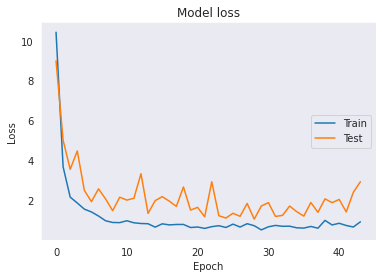

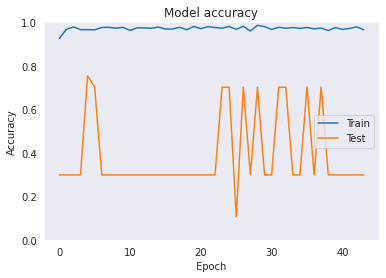

285/285 [==============================] - 2s 8ms/step
Acurácia no conjunto de teste: 0.2982456088066101
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.30      1.00      0.46        85

    accuracy                           0.30       285
   macro avg       0.15      0.50      0.23       285
weighted avg       0.09      0.30      0.14       285



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


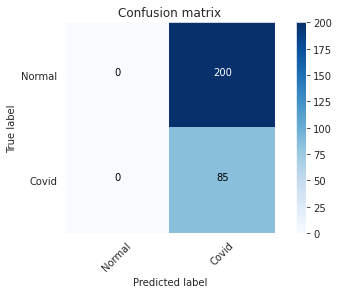

In [ ]:
plot_history(xray_history)
plot_metrics("/content/drive/My Drive/COVID19/resnet50_model.hdf5", testX_xray, testY_xray)

Observando os resultados da rede, observamos que os dados de validação não provém informações suficientes para habilitar o modelo a generalizar os resultados obtidos, isso pode ter ocorrido pelo desbalanceamento das amostras de COVID-19 e imagens normais.

Mesmo com o processo de Data Augmentation, o desbalanceamento pode ter influênciado nos resultados e a utilização de técnicas de ajuste de peso para as classes poderia ajudar a resolver ou minizar o erro do modelo.

In [ ]:
ct_history = run_model(trainX_ct, trainY_ct, testX_ct, testY_ct, model, "/content/drive/My Drive/COVID19/resnet50_model.hdf5")

Epoch 1/150
18/18 [==============================] - 10s 581ms/step - loss: 4.4908 - acc: 0.7323 - val_loss: 3.8501 - val_acc: 0.4667
Epoch 2/150
18/18 [==============================] - 10s 536ms/step - loss: 2.4953 - acc: 0.8723 - val_loss: 2.8576 - val_acc: 0.4667
Epoch 3/150
18/18 [==============================] - 9s 499ms/step - loss: 2.0422 - acc: 0.8635 - val_loss: 2.6006 - val_acc: 0.4667
Epoch 4/150
18/18 [==============================] - 9s 488ms/step - loss: 1.6411 - acc: 0.8901 - val_loss: 1.9874 - val_acc: 0.4667
Epoch 5/150
18/18 [==============================] - 9s 480ms/step - loss: 1.4501 - acc: 0.9149 - val_loss: 2.0773 - val_acc: 0.4667
Epoch 6/150
18/18 [==============================] - 10s 542ms/step - loss: 1.5344 - acc: 0.9167 - val_loss: 2.1910 - val_acc: 0.4600
Epoch 7/150
18/18 [==============================] - 9s 521ms/step - loss: 1.8574 - acc: 0.8786 - val_loss: 2.3887 - val_acc: 0.5333
Epoch 8/150
18/18 [==============================] - 9s 506ms/step

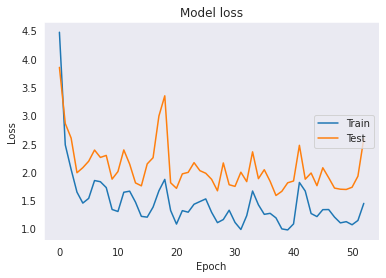

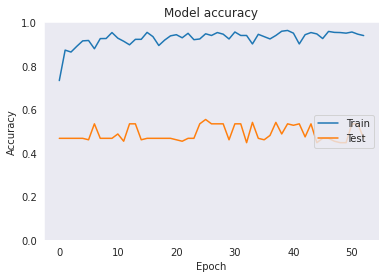

150/150 [==============================] - 1s 8ms/step
Acurácia no conjunto de teste: 0.46666666865348816
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.47      1.00      0.64        70

    accuracy                           0.47       150
   macro avg       0.23      0.50      0.32       150
weighted avg       0.22      0.47      0.30       150



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


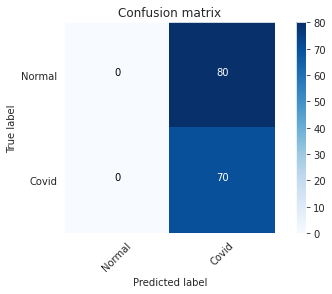

In [ ]:
plot_history(ct_history)
plot_metrics("/content/drive/My Drive/COVID19/resnet50_model.hdf5", testX_ct, testY_ct)

Assim como no conjunto de imagens de Raio-X o conjunto de dados de tomografia apresentou resultados ruins, neste caso, podemos observar uma pequena melhora na acurácia média do modelo que pode reforça a ideia de que balancear os datasets pode ajudar em resultados positivos.

De qualquer forma, a implementação da rede ResNet no conjunto de imagens que selecionamos apresentou resultados ruins.

## Efficient Net

In [ ]:
from keras_efficientnets import EfficientNetB0

def effnet_model():
  base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256,256,3))
  for layer in base_model.layers:
    layer.trainable = False

  x = Flatten()(base_model.output)
  x = Dense(units=512, activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)
  x = GaussianNoise(stddev=0.1)(x)
  x = Dropout(rate=0.2)(x)
  x = Dense(units=128, activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)
  x = Dropout(rate=0.2)(x)
  x = BatchNormalization()(x)
  x = Dense(units=64, activation='selu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)
  x = Dropout(rate=0.2)(x)
  x = BatchNormalization()(x)
  x = Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)

  model = Model(inputs=base_model.input, outputs=x)
    
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
  model.save("/content/drive/My Drive/COVID19/effnet_model.hdf5")
  model.summary()
  return model

model = effnet_model()

16719872/16717576 [==============================] - 3s 0us/step
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 128, 128, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_11 (BatchNo (None, 128, 128, 32) 128         conv2d_10[0][0]                  
__________________________________________________________________________________________________
swish_1 (Swish)                 (None, 128, 128, 32) 0           batch_normalization_11[0][0]     
___________________________

In [ ]:
xray_history = run_model(trainX_xray, trainY_xray, testX_xray, testY_xray, model, "/content/drive/My Drive/COVID19/effnet_model.hdf5")

Epoch 1/150
35/35 [==============================] - 20s 574ms/step - loss: 10.4624 - acc: 0.9421 - val_loss: 6.1334 - val_acc: 0.8667
Epoch 2/150
35/35 [==============================] - 17s 495ms/step - loss: 3.7762 - acc: 0.9738 - val_loss: 2.6504 - val_acc: 0.9439
Epoch 3/150
35/35 [==============================] - 17s 479ms/step - loss: 2.1746 - acc: 0.9701 - val_loss: 1.7433 - val_acc: 0.9509
Epoch 4/150
35/35 [==============================] - 17s 485ms/step - loss: 1.5643 - acc: 0.9665 - val_loss: 1.5314 - val_acc: 0.9123
Epoch 5/150
35/35 [==============================] - 16s 458ms/step - loss: 1.3751 - acc: 0.9665 - val_loss: 1.4408 - val_acc: 0.9298
Epoch 6/150
35/35 [==============================] - 16s 451ms/step - loss: 1.0399 - acc: 0.9738 - val_loss: 1.2020 - val_acc: 0.9123
Epoch 7/150
35/35 [==============================] - 16s 447ms/step - loss: 0.9115 - acc: 0.9774 - val_loss: 1.1532 - val_acc: 0.8632
Epoch 8/150
35/35 [==============================] - 16s 454m

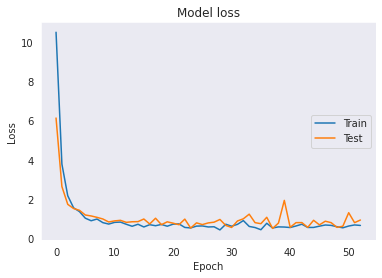

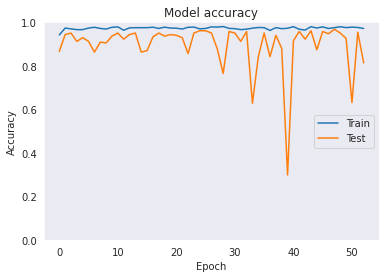

285/285 [==============================] - 1s 5ms/step
Acurácia no conjunto de teste: 0.8140350580215454
              precision    recall  f1-score   support

           0       1.00      0.73      0.85       200
           1       0.62      1.00      0.76        85

    accuracy                           0.81       285
   macro avg       0.81      0.87      0.80       285
weighted avg       0.89      0.81      0.82       285



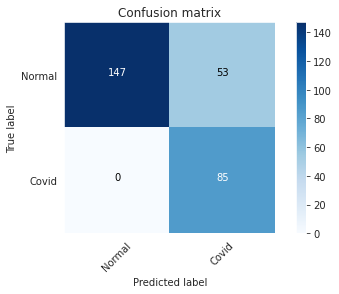

In [ ]:
plot_history(xray_history)
plot_metrics("/content/drive/My Drive/COVID19/effnet_model.hdf5", testX_xray, testY_xray)

Comparado ao modelo citados anteriormente, a arquitetura Efficient Net apresentou resultados satisfatórios de acurácia e métricas de precision, f1-score, recall, atingimos relativamente bons.

Entretanto as outras técnicas citadas anteriormente obtiveram resultados melhores para o nosso conjunto de dados e provavelmente têm melhores capacidades de generalização.

In [ ]:
ct_history = run_model(trainX_ct, trainY_ct, testX_ct, testY_ct, model, "/content/drive/My Drive/COVID19/effnet_model.hdf5")

Epoch 1/150
18/18 [==============================] - 9s 495ms/step - loss: 5.0569 - acc: 0.6915 - val_loss: 4.3832 - val_acc: 0.6400
Epoch 2/150
18/18 [==============================] - 8s 457ms/step - loss: 2.9202 - acc: 0.7986 - val_loss: 3.2553 - val_acc: 0.6600
Epoch 3/150
18/18 [==============================] - 8s 435ms/step - loss: 2.1125 - acc: 0.8351 - val_loss: 1.6169 - val_acc: 0.7467
Epoch 4/150
18/18 [==============================] - 8s 458ms/step - loss: 1.5411 - acc: 0.8351 - val_loss: 1.6128 - val_acc: 0.7333
Epoch 5/150
18/18 [==============================] - 7s 396ms/step - loss: 1.4269 - acc: 0.8723 - val_loss: 1.7201 - val_acc: 0.7067
Epoch 6/150
18/18 [==============================] - 9s 504ms/step - loss: 1.4340 - acc: 0.8872 - val_loss: 2.1107 - val_acc: 0.6400
Epoch 7/150
18/18 [==============================] - 9s 484ms/step - loss: 1.3092 - acc: 0.9149 - val_loss: 1.6885 - val_acc: 0.7200
Epoch 8/150
18/18 [==============================] - 8s 437ms/step - 

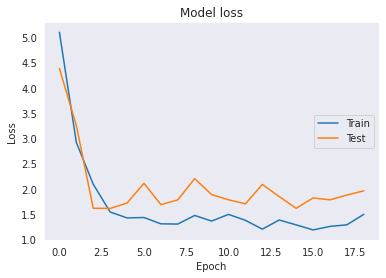

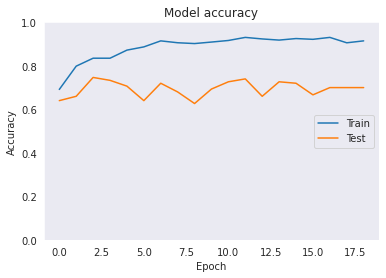

150/150 [==============================] - 1s 5ms/step
Acurácia no conjunto de teste: 0.699999988079071
              precision    recall  f1-score   support

           0       0.65      0.96      0.77        80
           1       0.90      0.40      0.55        70

    accuracy                           0.70       150
   macro avg       0.78      0.68      0.66       150
weighted avg       0.77      0.70      0.67       150



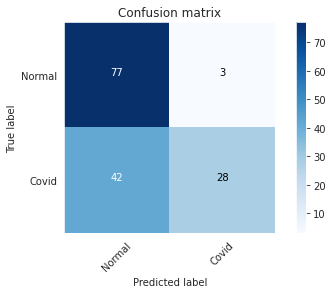

In [ ]:
plot_history(ct_history)
plot_metrics("/content/drive/My Drive/COVID19/effnet_model.hdf5", testX_ct, testY_ct)

Assim como nos resultados das imagens de Raio-X, as imagens de tomografia aplicadas ao modelo EfficientNet tiveram resultados bons, entretanto apresentam os mesmos problemas do outro conjunto de dados.

# Resultados Finais e Conclusões
Com base nas análises, foi possível observar a grande dificuldade em trabalhar com imagens para classificação, além de ser uma tarefa que demanda computacionalmente por se tratar de um grande volume de dados, é ainda mais complexa pelas grande quantidade de modelos disponíveis para trabalhar na classificação de imagens.

Foi interessante notar, que resultados satisfatórios para o conjunto de dados que coletamos foram obtidos por meio da aplicação de técnicas de transfer learning, onde certas camadas de uma rede neural são pré-treinadas em um grande conjunto de dados, e somente aplicadas no dataset em análise após a criação de novas camadas de saída facilita na extração de features relevantes para a classificação.

Em particular tivemos grandes dificuldades para lidar com a grande quantidade de arquivos no ambiente de execução do Google Colab, existe limitações na memória disponível na máquina alocada para processar os dados que gerou a necessidade de por exemplo limitar a quantidade de imagens analisadas e também pode ter sido um fator agravante para a acurácia dos modelos avaliados, em particular, para os conjuntos de dados de tomografia.

Outra dificuldade inicial foi a escolha do conjunto de dados que iriamos utilizar para executar as análises, apesar da grande quantidade de imagens disponíveis, muitas delas estavam hospedadas em servidores chineses que tinham taxas de transferência extremamente baixas. Inicialmente foram testadas outras metodologias para a seleção de dados de treino e teste e que gerou uma baixa acurácia dos resultados e testes efetuados, sendo necessário posteriormente alterar as funções de distribuição para ferramentas mais adequadas oferecidadas por bibliotecas como sklearn e Tensorflow.

Foi interessante observar que camadas convolucionais, comumente usadas na classsificação de imagens convencionais (animais, objetos), tiveram um bom desempenho no conjunto de dados médicos analisados, mesmo que, em arquiteturas simplificadas.

Finalmente, considerando o conjunto de imagens de tomografia computadorizada, chegamos a conclusão de que utilizar métodos de classificação podem não ser as ferramentas mais adequadas para auxiliar no diagnóstico de COVID-19, dado que mesmo as arquiteturas de redes neurais mais complexas apresentarem difulculdades para extrair features das imagens de tomografia computadorizada.

Considerando os trabalhos futuros, poderiamos explorar o ajuste e parâmetros dos modelos treinados, assim como a modificação das camadas inferiores e de saída dos modelos com o objetivo de melhorar os resultados obtidos para as imagens de tomografia. Outra possibilidade seria explorar métodos de segmentação com redes neurais que também ajudariam no objetivo de identificar regiões de atenção nos exames e que seriam ferramentas visuais para o auxílio de médicos no diagnóstico da COVID-19.